<a href="https://colab.research.google.com/github/PranavKamat06/phys152-2026/blob/main/Exercises/Homework-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1: Decision Tree Classifier (30 points)

In this exercise we will train a decision tree classifier for neutrino experiment data from [the MiniBOONE experiment](https://www.fnal.gov/pub/science/experiments/intensity/miniboone.html).

The goal is to prepare a binary classification to distinguish electron neutrinos (signal) from muon neutrinos (background). The dataset is taken from the UCI ML dataset repository.

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

data = fetch_openml("miniboone", parser="auto", version=1)
X, y = data["data"].values, (data["target"].values == "True").astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

## part 1(a): Data Exploration and Visualization (10 points)

Explore the dataset before building your ML classifier:
- How many events are in the training data and testing data?
- How many input features are there for each point in the training data?
- Plot at least three of the input features for events with `y_train==0` and for events with `y_train==1`.

In [44]:
# Add code here to explore the dataset
import numpy as np
print(X_train[0][0:3])
print(f"The total size of X is {X.shape[0]}")
print(f"We use {X_train.shape[0]} events for training and {X_test.shape[0]} events for testing X.")
print(f"The total size of y is {y.shape[0]}")
print(f"We use {y_train.shape[0]} events for training and {y_test.shape[0]} events for testing y.")
print(y_test.shape)

[4.09724 1.06346 5.50024]
The total size of X is 130064
We use 104051 events for training and 26013 events for testing X.
The total size of y is 130064
We use 104051 events for training and 26013 events for testing y.
(26013,)


The dataset seems to be a collection of inputs $(X,y)$ where $X_i$ is a collection of 50 data points and $y_i \in \{0,1\}$ is a binary value likely used to indicate whether we have a signal or background measurement. The train test split of our data is 80-20, wherein out of our 130,064 datapoints, we use 104,051 events for training and 26,013 events for testing. There appear to be 50 input features for each point $X_i$ in the training data. A plot of the first three input features for events with $y_{\text{train}}=1$ and a separate plot of the first three input features for events with $y_{\text{train}}=0$ is given below. I wasn't sure whether to plot frequency or value, so I did both to get a deeper understanding of the data. The first two features have pretty similar distributions, with many negative values for $y_{\text{train}}=0$ of order $10^3$, and a few positive values. Most $y_{\text{train}}=1$ values were small and positive. For feature 3, there was still a sprinkling of negative $y_{\text{train}}=0$ values of order $10^3$, but most were positive. Both background and signal events had many small $(10^0\text{ to }10^3)$ values, with signal events also having some larger values for feature 3, in the order of $10^3$ also, but up to $5000$ as opposed to $1000$.

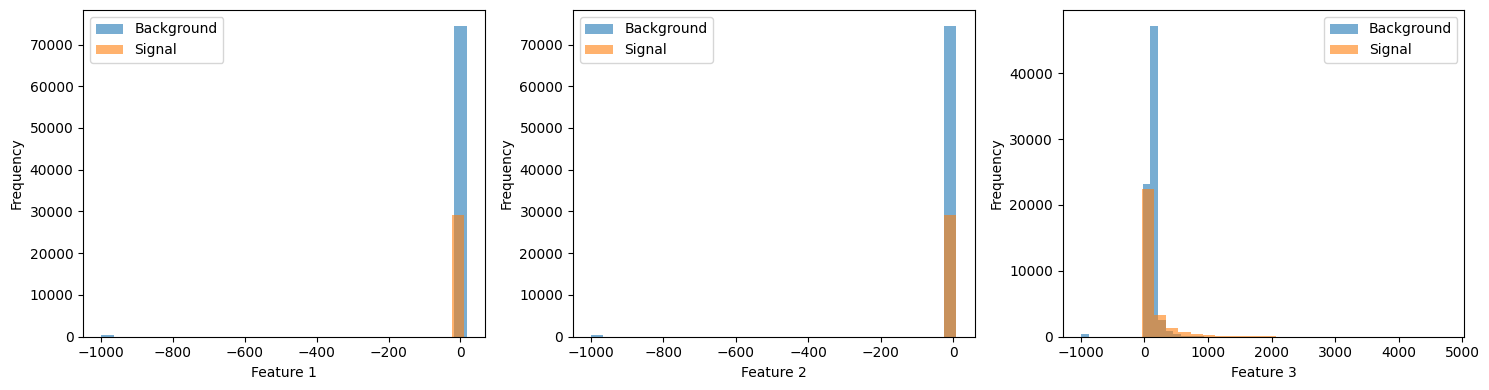

In [23]:
import matplotlib.pyplot as plt
X_train_one = X_train[y_train==1]
X_train_zero = X_train[y_train==0]
fig, axes = plt.subplots(1,3, figsize = (15, 4))
for i in range(3):
  axes[i].hist(X_train_zero[:,i], alpha =0.6, label = 'Background', bins =30)
  axes[i].hist(X_train_one[:,i], alpha =0.6, label = 'Signal', bins =30)
  axes[i].set_xlabel(f'Feature {i+1}')
  axes[i].set_ylabel('Frequency')
  axes[i].legend()

plt.tight_layout()
plt.show()



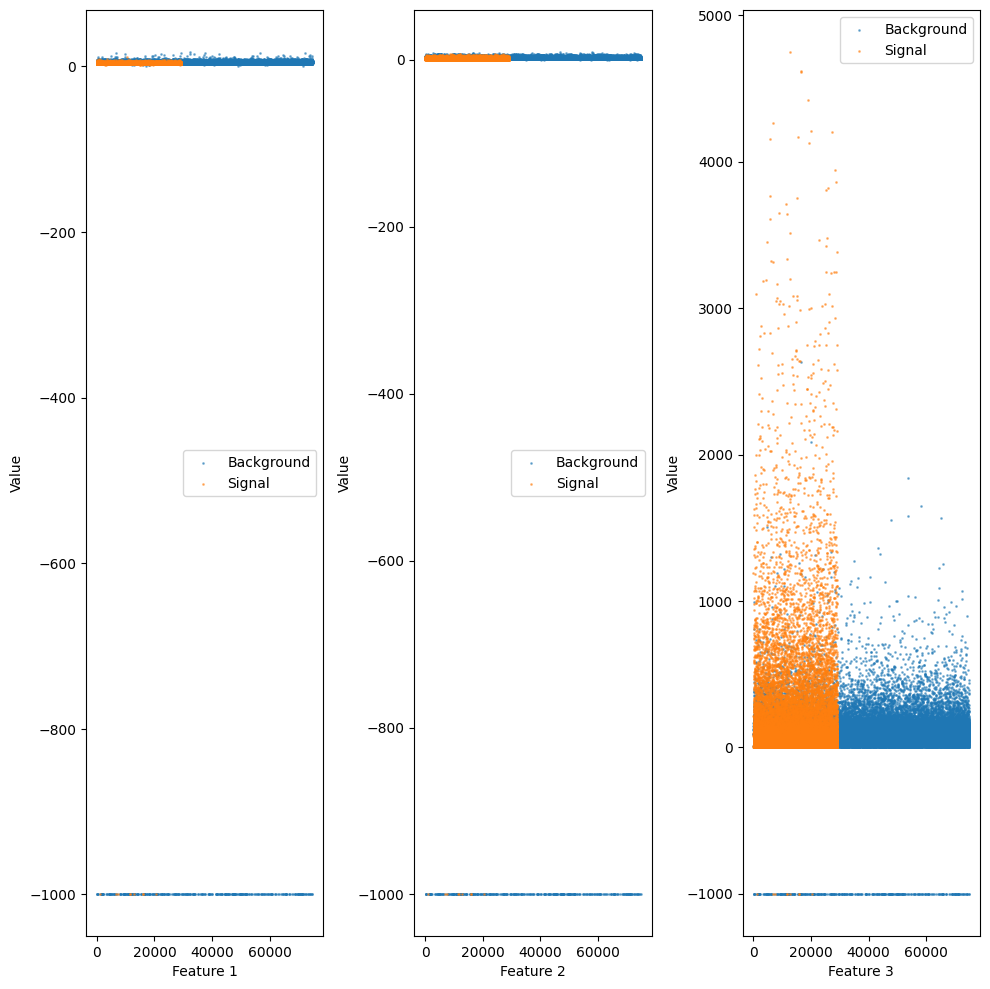

In [30]:

fig, axes = plt.subplots(1,3, figsize = (10,10))
for i in range(3):
  axes[i].scatter(range(len(X_train_zero)),X_train_zero[:,i], alpha = 0.5,label = 'Background', s = 1)
  axes[i].scatter(range(len(X_train_one)),X_train_one[:,i], alpha = 0.5,label = 'Signal', s = 1)
  axes[i].set_xlabel(f'Feature {i+1}')
  axes[i].set_ylabel('Value')
  axes[i].legend()
plt.tight_layout()
plt.show()

## part 1(b): Decision Tree (10 points)

Train a simple `DecisionTreeClassifier` with `max_depth=5` and the `gini` criterion to separate the electron neutrino signal and muon neutrino background.

Calculate the performance of the Decision Tree:
- confusion matrix
- ROC curve
- Area Under Curve (AUC)


Our confusion matrix is 
[[17567  1091]
 [ 1738  5617]]


ValueError: x and y must have same first dimension, but have shapes (2,) and (1,)

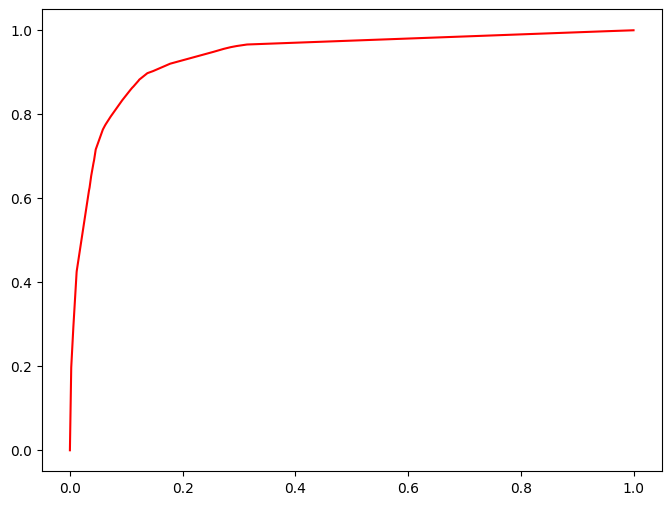

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
# We train our decision tree model.
score=[]
dtclassifier = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth = 5)
dtclassifier.fit(X_train, y_train)
dtclassifier.score(X_train, y_train),dtclassifier.score(X_test, y_test)


# Then, we evaluate its performance with a confusion matrix,
cm = confusion_matrix(np.asarray(y_test).flatten(), np.asarray(dtclassifier.predict(X_test)).flatten())
print("Our confusion matrix is " + f"\n" + f"{cm}")

# As well as an AUC score and an ROC plot.
fpr, tpr, thresholds = metrics.roc_curve((np.asarray(y_test)).flatten(), (dtclassifier.predict_proba(X_test))[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color = 'red', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0,1], [0.1], color = 'green', linestyle='--',label = "Random Classifier")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.title('Receiver Operating Characteristic (ROC) curve for our decision tree')
plt.legend(loc='lower right')
print(f"\n Our AUC score is {roc_auc:.4f} \n\n\n")
plt.show()



## part 1(c): Gini impurity measure

Visualize the decision tree, and pick three of the leaf nodes in your decision tree visualization.

For each node, calculate the Gini impurity by hand to check against the calculation from scikit-learn. Show the steps of your calculation and the result.

In [ ]:
# Add code to visualize the decision tree and get impurity measures

# Exercise 2: Backpropagation (30 points)

In this exercise you will gain some experience with the backpropagation equations and the numerical calculations of the gradient.



## part 2(a): Backpropagation theory (15 points)

Complete the proofs of [Nielsen's equations BP3 and BP4](http://neuralnetworksanddeeplearning.com/chap2.html#proof_of_the_four_fundamental_equations_(optional)).

In Nielsen's notation (but with layer numbers written in parenthesis for clarity):
$$
\begin{align}
\frac{\partial C}{\partial b_j^{(l)}} &= \delta_j^{(l)} & \quad \quad \text{(BP3)} \\
\frac{\partial C}{\partial w_{jk}^{(l)}} &= a_k^{(l-1)} \delta_j^{(l)} & \quad \quad \text{(BP4)}
\end{align}
$$
where $C$ is the cost function (loss function), $w$ and $b$ are weights and biases, $a$ is the post-activation output for the layer, and $\delta$ is the error of a single neuron.

## part 2(b): Numerical calculation (15 points)

Consider a single perceptron node with 1-dimensional input $x$. The weight and bias of the node are $w=0.5$ and $b=0.1$. We use the ReLU activation function on the output of the node and the mean square error loss function.

If the data input and target are $x=1, y=1$:
- What is the loss function value?
- What is the gradient $\partial L/\partial w$?
- What is the gradient $\partial L/\partial b$?

You can do this by hand. Show your work, and feel free to check your answer with some code.




# Exercise 3: Deep Neural Networks (40 points)

In this exercise we will train a deep neural network for neutrino experiment data from [the MiniBOONE experiment](https://www.fnal.gov/pub/science/experiments/intensity/miniboone.html).

The goal is similar to Exercise 1 above: prepare a binary classification to distinguish electron neutrinos (signal) from muon neutrinos (background).

In this exercise, you will set up a neural network model using PyTorch and train it using the MiniBOONE training data, then test it on the testing data.

## part 3(a) (20 points): DNN with tanh activation

Implement a deep neural network (at least 1 hidden layer between the input and output layers) to classify events as electron neutrinos (signal) or muon neutrinos (background). Use the tanh activation function, except in the output layer.

Here are some starting points for the DNN:
- 3 hidden layers w/ 64 units each
- BCE loss function
- SGD optimizer w/ batch size of 128

You should expect to train for at least 50 epochs.

In [ ]:
# Put code here to implement the DNN to classify neutrino events
# You can use the examples from class and the hands-on notebooks

## part 3(b) (10 points): DNN performance assessment

Calculate the performance of the DNN on the testing data:
- confusion matrix
- ROC curve
- Area Under Curve (AUC)



In [ ]:
# Put code here to assess the DNN performance
# You can use the examples from class and the hands-on notebooks

## part 3(c) (10 points): Change of activation function

Replace the sigmoid activation functions with the ReLU activation functions, in the layers where it is possible.
(Hint: there is one layer where you can't use the ReLU activation function--why not?)

What happens with the training and performance? Can you improve the performance relative to the original training with sigmoid activation functions?

In [ ]:
# Put code here to change the activation functions to sigmoid,
# then retrain and re-assess the performance.
# (It's reasonable to cut-and-paste from the code in part 3(a).)